In [12]:
def graficopenaltis(equipo):

    import pandas as pd
    dfpartidos=pd.read_json('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/37/42.json')
    hola=dfpartidos['home_team'].apply(pd.Series)
    ey=list(hola)
    dfpartidos[ey]=pd.DataFrame(dfpartidos.home_team.values.tolist(),index=dfpartidos.index)
    hola=dfpartidos['away_team'].apply(pd.Series)
    ey=list(hola)
    dfpartidos[ey]=pd.DataFrame(dfpartidos.away_team.values.tolist(),index=dfpartidos.index)
    dfsoloequipo=dfpartidos.loc[(dfpartidos['home_team_name']==equipo) | (dfpartidos['away_team_name']==equipo)]
    listapartidos=dfsoloequipo['match_id'].tolist()
    filenames=[]
    for i in listapartidos:
        filenames.append(pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/events/'+str(i)+'.json'))
        dfeventos = pd.concat(filenames, ignore_index=True,sort=True)    

    dftiros=dfeventos.loc[dfeventos['type']=={'id': 16, 'name': 'Shot'}].dropna(axis=1)
    hola=dftiros['shot'].apply(pd.Series)
    ey=list(hola)
    dftiros[ey]=pd.DataFrame(dftiros.shot.values.tolist(),index=dftiros.index)
    hola=dftiros['team'].apply(pd.Series)
    ey=list(hola)
    dftiros[ey]=pd.DataFrame(dftiros.team.values.tolist(),index=dftiros.index)
    dfpenaltispropios=dftiros.loc[(dftiros['name']==equipo) & (dftiros['type']=={'id': 88, 'name': 'Penalty'})]
    dfparagrafico=dfpenaltispropios.loc[:,['end_location','outcome','player']]
    hola1=dfparagrafico['end_location'].apply(pd.Series)
    ey1=list(hola1)
    dfparagrafico[ey1]=pd.DataFrame(dfparagrafico.end_location.values.tolist(),index=dfparagrafico.index)
    hola2=dfparagrafico['outcome'].apply(pd.Series)
    ey2=list(hola2)
    dfparagrafico[ey2]=pd.DataFrame(dfparagrafico.outcome.values.tolist(),index=dfparagrafico.index)
    dfparagrafico.rename(columns={0: 'x', 1: 'y',2: 'z'},inplace=True)
    dfparagrafico[['player_id','player_name']] = pd.DataFrame(dfparagrafico.player.values.tolist(), index= dfparagrafico.index)
    dfparagrafico.drop(columns=['end_location','outcome','player','player_id','x'],inplace=True)

    if len(dfparagrafico)==0:
        totales=0
        anotados=0
        fallados=0
        porcentaje="-"
    else:
        totales=len(dfparagrafico)
        filasanotados = dfparagrafico.apply(lambda x: True if x['name'] == "Goal" else False , axis=1)
        anotados = len(filasanotados[filasanotados == True].index)
        fallados=totales-anotados
        porcentaje=(anotados/totales)*100
        porcentaje=round(porcentaje,2)

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(18,14))

    #Seleccionamos todas las lanzadoras distintas
    lanzadoras=dfparagrafico.player_name.unique()

    #Creamos un dataframe con esas lanzadoras 
    dfloop=pd.DataFrame(data=lanzadoras)

    #Empezamos el bucle.
    #Para el caso de una lanzadora


    if len(lanzadoras)==1:
        #Añadimos la columna con los marcadores
        dfloop['marcador']='o'
        #Definimos la variable lanzadora1 para guardar el nombre de la jugadora
        lanzadora1=dfloop.iloc[0,0]
        #Renombramos la columna de los nombres para poder hacer merge con el dataframe de la celda anterior
        dfloop.rename(columns={0: "player_name"},inplace=True)
        dfbueno=dfparagrafico.merge(dfloop,on='player_name')
    
        posiciony=dfbueno.columns.get_loc("y")
        posicionz=dfbueno.columns.get_loc("z")
        posicionresultado=dfbueno.columns.get_loc("name")
        posicionjugadora=dfbueno.columns.get_loc("player_name")
        posicionmarcador=dfbueno.columns.get_loc("marcador")
    
        #Empezamos el bucle para los disparos
        for i in range(len(dfbueno)):
            if dfbueno.iloc[i,posicionresultado] == "Goal":
                plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])     
            else:
                plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])

   
    
        g = plt.scatter([],[], s=50, marker='o', color='black',alpha=0.8,label=lanzadora1)
        plt.legend(handles=[g],scatterpoints=1,title='Lanzadoras',loc=(0.1,0.07),prop=dict(family='bahnschrift',weight=500),title_fontsize=10,framealpha=1,edgecolor='black',borderpad=1)
    
    #Para el caso de dos lanzadoras

    if len(lanzadoras)==2:
        #Añadimos la columna con los marcadores
        dfloop['marcador']=('o','s')
        #Definimos la variable lanzadora1 para guardar el nombre de la jugadora
        lanzadora1=dfloop.iloc[0,0]
        lanzadora2=dfloop.iloc[1,0]
        #Renombramos la columna de los nombres para poder hacer merge con el dataframe de la celda anterior
        dfloop.rename(columns={0: "player_name"},inplace=True)
        dfbueno=dfparagrafico.merge(dfloop,on='player_name')
    
        posiciony=dfbueno.columns.get_loc("y")
        posicionz=dfbueno.columns.get_loc("z")
        posicionresultado=dfbueno.columns.get_loc("name")
        posicionjugadora=dfbueno.columns.get_loc("player_name")
        posicionmarcador=dfbueno.columns.get_loc("marcador")
    
        #Empezamos el bucle para el gráfico
        for i in range(len(dfbueno)):
            if dfbueno.iloc[i,posicionresultado]=="Goal":
                if dfbueno.iloc[i,posicionjugadora]==lanzadora1:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora2:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
            else:
                if dfbueno.iloc[i,posicionjugadora]==lanzadora1:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora2:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
    
        g1 = plt.scatter([],[], s=50, marker='o', color='black',alpha=0.8)
        g2 = plt.scatter([],[], s=50, marker='s', color='black',alpha=0.8)
        plt.legend((g1,g2),
           (lanzadora1,lanzadora2),
           scatterpoints=1,title='Lanzadoras',
           loc=(0.1,0.07),
           ncol=1, prop=dict(family='bahnschrift',weight=500),
           title_fontsize=10,
           labelspacing=1,framealpha=1,edgecolor='black',borderpad=1) 
    

    #Para el caso de tres lanzadoras

    if len(lanzadoras)==3:
        #Añadimos la columna con los marcadores
        dfloop['marcador']=('o','s','d')
        #Definimos la variable lanzadora1 para guardar el nombre de la jugadora
        lanzadora1=dfloop.iloc[0,0]
        lanzadora2=dfloop.iloc[1,0]
        lanzadora3=dfloop.iloc[2,0]
        #Renombramos la columna de los nombres para poder hacer merge con el dataframe de la celda anterior
        dfloop.rename(columns={0: "player_name"},inplace=True)
        dfbueno=dfparagrafico.merge(dfloop,on='player_name')
    
        posiciony=dfbueno.columns.get_loc("y")
        posicionz=dfbueno.columns.get_loc("z")
        posicionresultado=dfbueno.columns.get_loc("name")
        posicionjugadora=dfbueno.columns.get_loc("player_name")
        posicionmarcador=dfbueno.columns.get_loc("marcador")
    
        #Empezamos el bucle para el gráfico
        for i in range(len(dfbueno)):
            if dfbueno.iloc[i,posicionresultado]=="Goal":
                if dfbueno.iloc[i,posicionjugadora]==lanzadora1:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora2:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora3:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
            else:
                if dfbueno.iloc[i,posicionjugadora]==lanzadora1:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora2:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora3:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])

        g1 = plt.scatter([],[], s=50, marker='o', color='black',alpha=0.8)
        g2 = plt.scatter([],[], s=50, marker='s', color='black',alpha=0.8)
        g3 = plt.scatter([],[], s=50, marker='d', color='black',alpha=0.8)
        plt.legend((g1,g2,g3),
           (lanzadora1,lanzadora2,lanzadora3),
           scatterpoints=1,title='Lanzadoras',
           loc=(0.1,0.07),
           ncol=1, prop=dict(family='bahnschrift',weight=500),
           title_fontsize=10,
           labelspacing=1,framealpha=1,edgecolor='black',borderpad=1)
    
    #Para el caso de 4 jugadoras
    if len(lanzadoras)==4:
        #Añadimos la columna con los marcadores
        dfloop['marcador']=('o','s','d','P')
        #Definimos la variable lanzadora1 para guardar el nombre de la jugadora
        lanzadora1=dfloop.iloc[0,0]
        lanzadora2=dfloop.iloc[1,0]
        lanzadora3=dfloop.iloc[2,0]
        lanzadora4=dfloop.iloc[3,0]
        #Renombramos la columna de los nombres para poder hacer merge con el dataframe de la celda anterior
        dfloop.rename(columns={0: "player_name"},inplace=True)
        dfbueno=dfparagrafico.merge(dfloop,on='player_name')
    
        posiciony=dfbueno.columns.get_loc("y")
        posicionz=dfbueno.columns.get_loc("z")
        posicionresultado=dfbueno.columns.get_loc("name")
        posicionjugadora=dfbueno.columns.get_loc("player_name")
        posicionmarcador=dfbueno.columns.get_loc("marcador")
    
        #Empezamos el bucle para el gráfico
        for i in range(len(dfbueno)):
            if dfbueno.iloc[i,posicionresultado]=="Goal":
                if dfbueno.iloc[i,posicionjugadora]==lanzadora1:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora2:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora3:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora4:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='green',marker=dfbueno.iloc[i,posicionmarcador])
            else:
                if dfbueno.iloc[i,posicionjugadora]==lanzadora1:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora2:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora3:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
                if dfbueno.iloc[i,posicionjugadora]==lanzadora4:
                    plt.scatter(x=dfbueno.iloc[i,posiciony],y=dfbueno.iloc[i,posicionz],s = 200,c='red',marker=dfbueno.iloc[i,posicionmarcador])
    
        g1 = plt.scatter([],[], s=200, marker='o', color='black',alpha=0.8)
        g2 = plt.scatter([],[], s=200, marker='s', color='black',alpha=0.8)
        g3 = plt.scatter([],[], s=200, marker='d', color='black',alpha=0.8)
        g4 = plt.scatter([],[], s=200, marker='P', color='black',alpha=0.8)
        plt.legend((g1,g2,g3,g4),
           (lanzadora1,lanzadora2,lanzadora3,lanzadora4),
           scatterpoints=1,title='Lanzadoras',
           loc=(0.1,0.07),
           ncol=1, prop=dict(family='bahnschrift',weight=500),
           title_fontsize=10,
           labelspacing=1,framealpha=1,edgecolor='black',borderpad=1)
                
    # OPTA PITCH
    # Pitch Outline & Centre Line 
    plt.plot([34,46],[0,0], color="black")
    plt.plot([36,36],[0,2.67], color="black") #upper line x_start x_end y_start y_end
    plt.plot([36,44],[2.67,2.67], color="black")
    plt.plot([44,44],[2.67,0], color="black")


    
    plt.ylim(-2, 6)
    plt.gca().set_aspect('equal')

    ax.text(38, -1.2, s ="Penalti anotado", size = 35, color='green', ha='left', family='bahnschrift')
    ax.text(41.25, -1.2, s ="/", size = 35, color='black', ha='left', family='bahnschrift')
    ax.text(41.5, -1.2, s ="Penalti fallado", size = 35, color='red', ha='left', family='bahnschrift')
    ax.text(40, 5, s ="Penaltis lanzados: {}".format(equipo), size = 35, color='black', ha='center', family='bahnschrift')
    ax.text(40,3.5, s ="Totales: {} \n Anotados: {} \n Fallados: {} \n Porcentaje de acierto: {}%".format(totales,anotados,fallados,porcentaje), size = 25, color='black', ha='center', family='bahnschrift')


    # Quitar Ejes

    plt.axis('off')
    plt.show() 

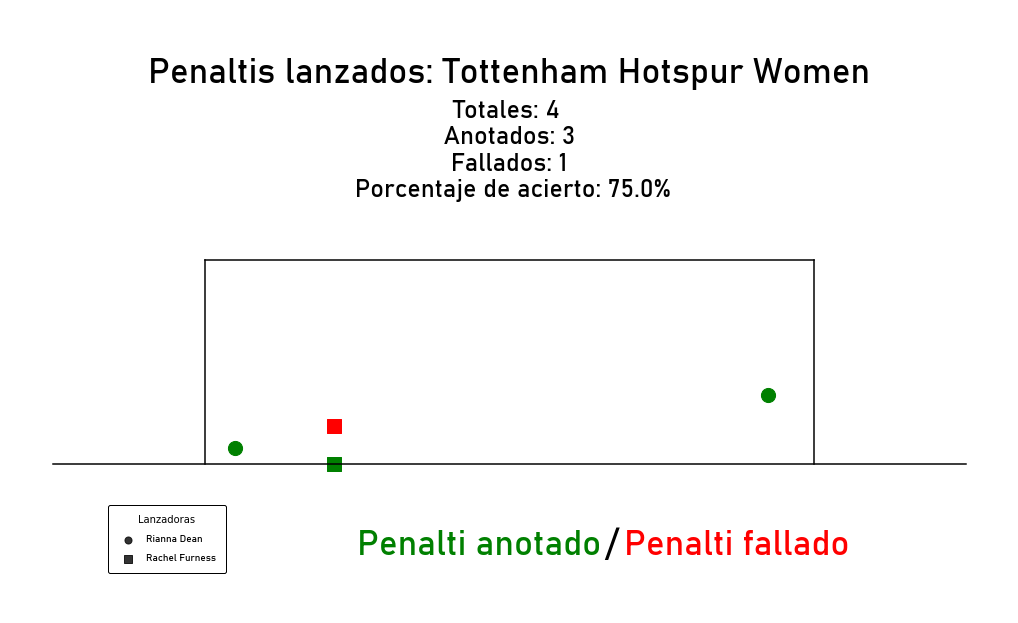

In [14]:
graficopenaltis("Tottenham Hotspur Women")